                                        PREDICTING AGE OF ATHLETES BASED OFF OF OLYMPICS DATA
**INTRODUCTION**

Every four years, nations gather the best of their best, their peak athletes to compete in the Summer Olympics, competing in the highest echelon of their respective sports. Maintaining their spot at the top for many years is no easy feat however. As such, we are trying to predict an athlete’s age based on multiple factors. We will try to determine whether factors such as an athlete’s: height, weight, Summer Olympics appearances, and the amount of medals they have won have any correlation to their age. The dataset we will be using has gathered Olympic data for 120 years! From all the way back in 1896, to 2016. It contains the names of athletes and their statistics, such as their height, weight, team, medals won, years they have participated etc. For our purposes however, we will only be using Summer Olympics data as well as all the predictors as listed above. 

**EXPECTED OUTCOMES AND SIGNIFICANCE**

Through our analysis of the athlete dataset, we expect to find the ages of the athletes based on their height, weight, the number of times they've participated in the Olympics, and the number of medals they've won. With this, there are some new perspectives or debates that are opened up, specifically within the rules and regulations for the Olympics. It also shines some light onto the recognition of age differences/variances in the Olympics, regardless of standings and medals. Our results and observations lead into numerous diverse questions such as: is age an impactful factor for winning medals? Should there be age restrictions or limitations in the Olympics? Does an individual with a greater age, in comparison to a new Olympian, have a advantageous position? Does a greater age imply or directly correlate to greater amounts of medals won, or vise versa? 

**METHODS**

We are predicting the age of an athlete based on the predictor's height, weight, times they've been to the olympics, and number of medals won. For our exploratory plot, we'll show average medals won per olympics vs age of athlete. We will be only using data gained from the Summer Olympics. We will be using line plots as well as scatter plots for our visualizations.


In [2]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [3]:
athlete<-read_csv("https://raw.githubusercontent.com/Mahekbhardwaj/DSCI-100-group38/main/athelete_data.csv")
athlete <- athlete |>
slice(1:1499)
#athlete


Rows: 1800 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): Name, Sex, Team, NOC, Games, Season, City, Sport, Event, Medal
dbl  (4): Age, Height, Weight, Year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
head(athlete)
tail(athlete)
#we see that the data is already in a tidy format

Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA


Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
Nelson Luis Adams,M,21,NA,81,Puerto Rico,PUR,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Heavyweight,NA
Nicola Virginia Adams,F,29,164,51,Great Britain,GBR,2012 Summer,2012,Summer,London,Boxing,Boxing Women's Flyweight,Gold
Nicola Virginia Adams,F,33,164,51,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Women's Flyweight,Gold
Odalys Adams Castillo,F,25,171,59,Cuba,CUB,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's 100 metres Hurdles,NA
Paul Adams,M,24,185,98,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Skeet,NA
"Phillip Maxwell ""Phil"" Adams",M,39,163,93,Australia,AUS,1984 Summer,1984,Summer,Los Angeles,Shooting,"Shooting Men's Free Pistol, 50 metres",NA


In [5]:
# we only need data from the most recent summer olympics in the dataset
# finding the most recent year 
recent_year <-  athlete |> select(Year) |>
map_df(max) |>
        pull()
recent_year

[1] 2016

In [6]:
# we know the most recent year is 2016, so now we filter for year==2016 and season==summer
athlete<- athlete|>
                filter(Year== recent_year ,Season=="Summer")
head(athlete)

Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
Andreea Aanei,F,22,170,125,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NA
Nstor Abad Sanjun,M,23,167,64,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NA
Nstor Abad Sanjun,M,23,167,64,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NA
Nstor Abad Sanjun,M,23,167,64,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NA
Nstor Abad Sanjun,M,23,167,64,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NA
Nstor Abad Sanjun,M,23,167,64,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,NA


In [7]:
#changing the age column type to factor
#splitting into training and testing data
mutate(athlete,Age=as_factor(Age))
athlete_split <- initial_split(athlete, prop = 0.75, strata = Age)
athlete_train <- training(athlete_split)
athlete_test <- testing(athlete_split)

Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<chr>,<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
Andreea Aanei,F,22,170,125,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NA
Nstor Abad Sanjun,M,23,167,64,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NA
Nstor Abad Sanjun,M,23,167,64,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NA
Nstor Abad Sanjun,M,23,167,64,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NA
Nstor Abad Sanjun,M,23,167,64,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NA
Nstor Abad Sanjun,M,23,167,64,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,NA
Nstor Abad Sanjun,M,23,167,64,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Pommelled Horse,NA
Antonio Abadia Beci,M,26,170,65,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 5,000 metres",NA
Giovanni Abagnale,M,21,198,90,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze


In [18]:
#exploratory analysis
#finding out the number of times each athlete has attended the olympics, and number of medals won
athlete_number<- athlete_train |> group_by(Name) |>
                    summarize(n=n()) |>
                    rename("olympics attended"="n")
                    
head(athlete_number)
tail(athlete_number)

Name,olympics attended
<chr>,<int>
Abdelhalim Muhammad Abou,1
Abdulqdir Abdullayev,1
Abubakar Abbas Abbas,1
Adlan Aliyevich Abdurashidov,1
Ahmad Abughaush,1
Ahmed Abdel Naeim,1


Name,olympics attended
<chr>,<int>
Tanya Acosta,1
Tesfaye Abera Dibaba,1
Thorine Christelle Aboa Mbeza,1
Waheed Abdulridha Waheed Karaawi,1
Yelena Vasilyevna Abramchuk (Kopets-),1
rika Abril Surez,1


In [9]:
#number of medals won per athlete
#indexing NA and non-NA values in Medal column to 0 and 1 medals won respectively
athlete_train$Medal <- ifelse(!is.na(athlete_train$Medal), 1, athlete_train$Medal)
athlete_train[["Medal"]][is.na(athlete_train[["Medal"]])]<-0
head(athlete_train)

Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
Andreea Aanei,F,22,170,125,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,0
Nstor Abad Sanjun,M,23,167,64,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,0
Nstor Abad Sanjun,M,23,167,64,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,0
Nstor Abad Sanjun,M,23,167,64,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,0
Nstor Abad Sanjun,M,23,167,64,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,0
Giovanni Abagnale,M,21,198,90,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,1


In [29]:
#exploratory analysis- creating a table to find the number of medals won by each athlete
#converting medal col to int type
athlete_train$Medal <- as.integer(athlete_train$Medal)
athlete_medal<-athlete_train|>
                group_by(Age,Height,Weight)|>
                summarize(medalcount=n())
athlete_medal

`summarise()` has grouped output by 'Age', 'Height'. You can override using the
`.groups` argument.


Age,Height,Weight,medalcount
<dbl>,<dbl>,<dbl>,<int>
18,172,61,1
18,182,68,2
19,160,46,1
19,163,53,1
19,170,62,1
20,165,60,1
20,175,66,1
20,178,68,1
20,180,74,1


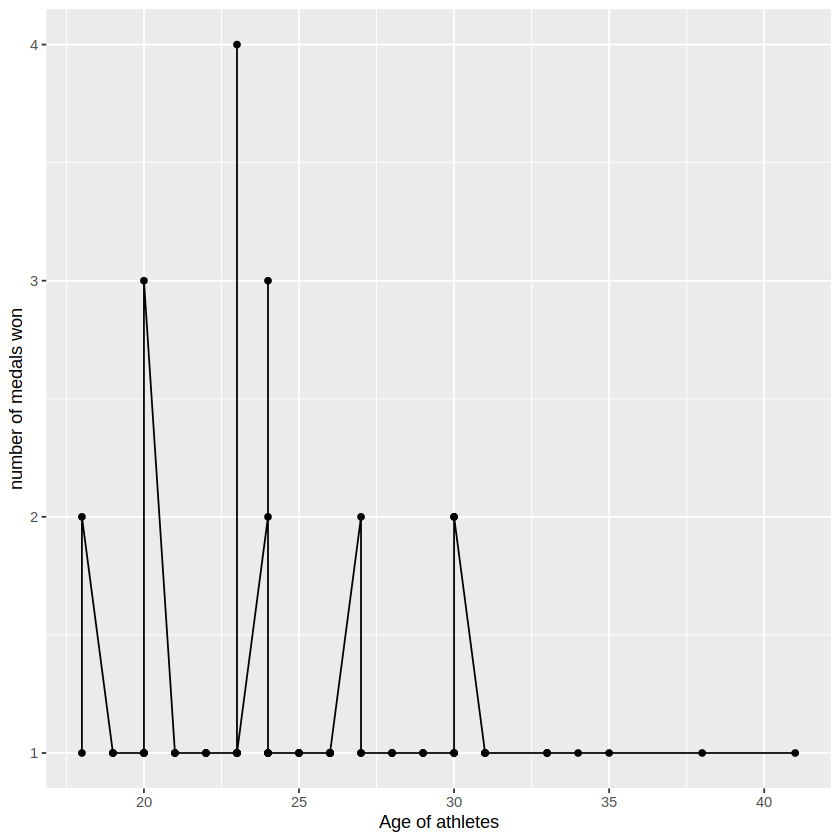

In [30]:
#exploratory analysis- vizualizing number of medals won against age to see the trend in their relationship.
medal_age_plot<-athlete_medal|>
                ggplot(aes(y=medalcount,x=Age)) +
                geom_point()+ geom_line()+
                labs(y="number of medals won",x="Age of athletes")
medal_age_plot

In [32]:
#recipe, tuning etc.

ath_recipe <- recipe(Age ~. , data = athlete_medal) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

ath_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

ath_vfold <- vfold_cv(athlete_medal, v = 5, strata = Age)

ath_wkflw <- workflow() |>
  add_recipe(ath_recipe) |>
  add_model(ath_spec)

ath_wkflw

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [33]:
install.packages("kknn")
library(kknn)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [36]:
gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 2))

ath_results <- ath_wkflw |>
  tune_grid(resamples = ath_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

ath_results

x Fold3: preprocessor 1/1, model 1/1 (predictions):
  Error in `mutate()`:
  ℹ In argument: `.row = orig_rows`.
  Caused by error:
  ! `.row` must be size 14 or 1, not 15.



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,5.919418,4,0.5770489,Preprocessor1_Model01
3,rmse,standard,5.427650,4,0.3511588,Preprocessor1_Model02
5,rmse,standard,5.070885,4,0.2887421,Preprocessor1_Model03
7,rmse,standard,4.946309,4,0.2501511,Preprocessor1_Model04
9,rmse,standard,4.884235,4,0.1614507,Preprocessor1_Model05
11,rmse,standard,4.979806,4,0.2344773,Preprocessor1_Model06
13,rmse,standard,4.996235,4,0.2282655,Preprocessor1_Model07
15,rmse,standard,4.998212,4,0.2234218,Preprocessor1_Model08
17,rmse,standard,5.047195,4,0.2402593,Preprocessor1_Model09
